# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [45]:
import pandas as pd
import seaborn as sns

<AxesSubplot: >

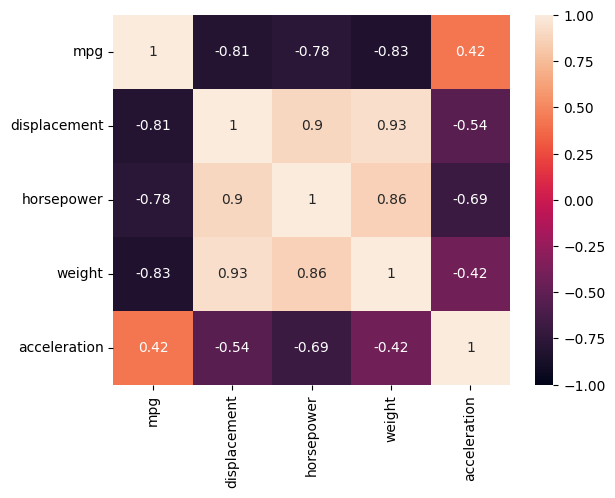

In [46]:
# import data
auto_data = pd.read_csv('./auto-mpg.csv')
numerical_auto_data = auto_data.drop(columns='origin') 

# get correlation matrix
cm = numerical_auto_data.corr()
# get heatmap
sns.heatmap(cm, vmin=-1, vmax=1, center=0, annot=True, cmap='rocket')

In a simple linear regression model for predicting `mpg`, we would be least likely to select the `acceleration` attribute to be the independent variable, since it has the weakest correlation with `mpg` at $0.42$. Although `displacement`, `horsepower`, and `weight` have negative correlation values, the strength of a correlation is more related to the absolute value. In other words, correlations close to 1, even if negative, are more useful than correlations close to 0. A negative correlation in our case simply means that an increase in `displacement`, `horsepower`, or `weight` causes a decrease `mpg`.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

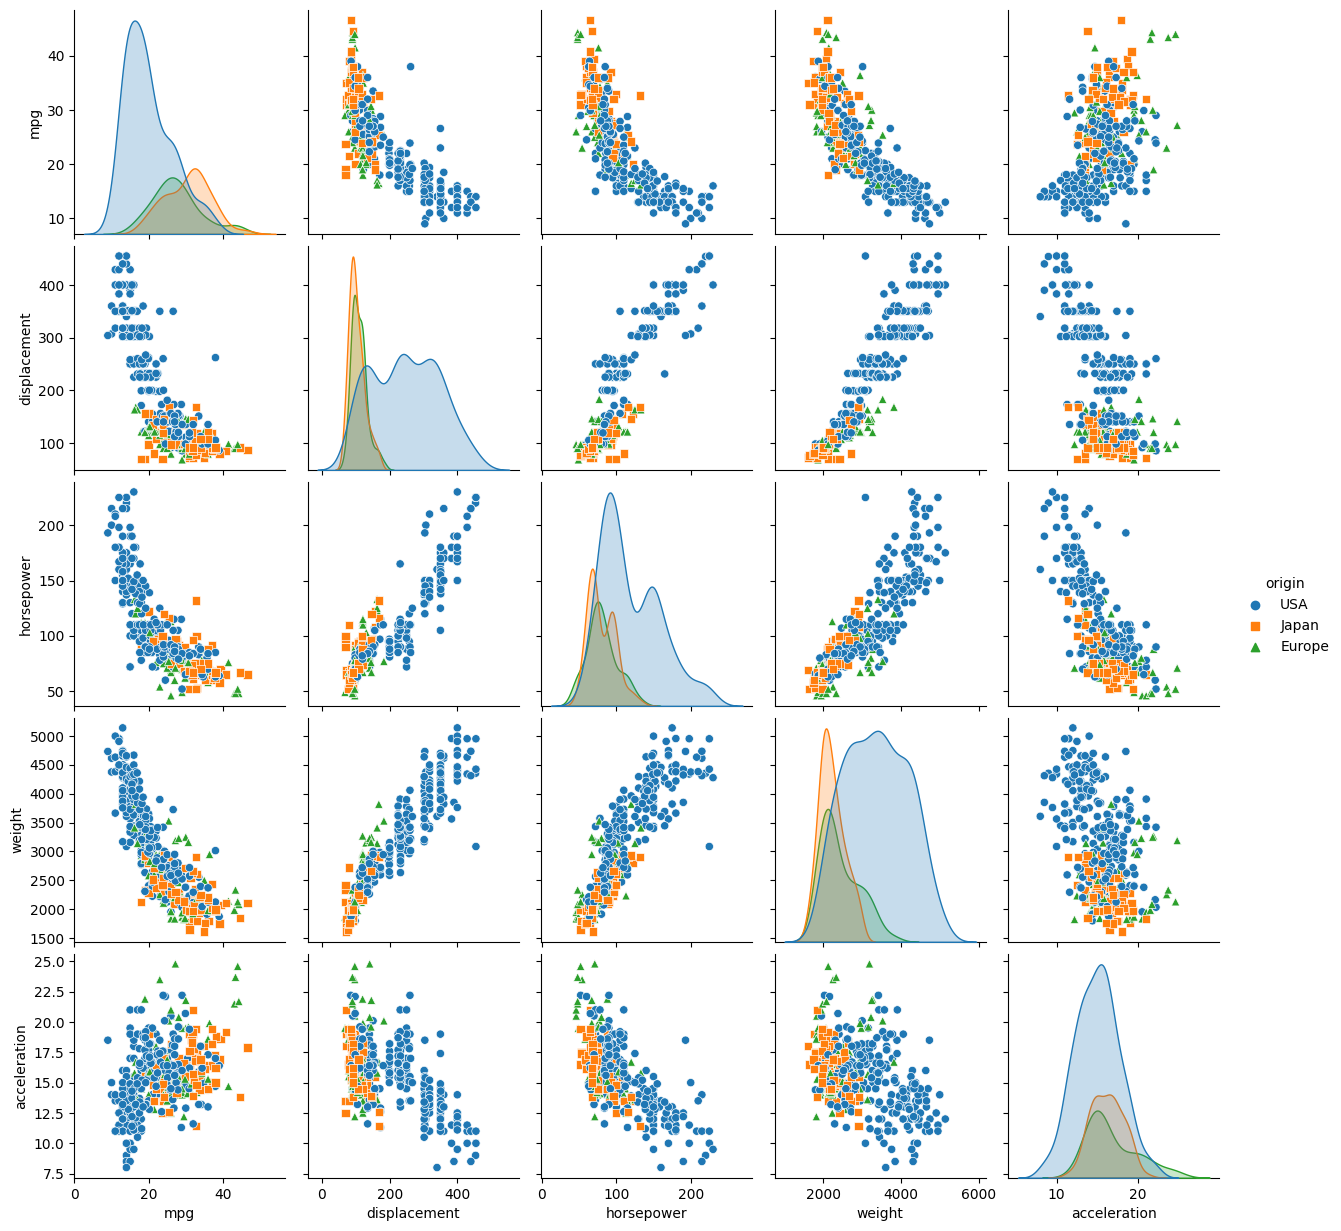

In [47]:

sns.pairplot(
    data=auto_data, 
    hue='origin',
     markers=['o', 's', '^']
)

The horsepower mpg scatter plot looks like it fits most similarly to a negative second order polynomial regression model. This is because the line is curved and follows a pattern, therefore simple linear regression would not be sufficient to cover the data. Logistic regression would not work because logistic regression is for identifying categorical variables, and mpg is numerical. 

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [48]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(auto_data, test_size=0.2, random_state=42)

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [49]:
x_train, x_test = train['weight'], test['weight']
y_train, y_test = train['mpg'], test['mpg']

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression() # initialize regression model
col_vector = lambda x: np.asarray(x).reshape(-1,1) # reshape into require format for sklearn args

reg.fit(X=col_vector(x_train), y=y_train) # adjust model weights

y_train_pred = reg.predict( col_vector(x_train) ) # run training set through model
y_test_pred = reg.predict( col_vector(x_test) ) # run testing set through model

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred) # get error

pd.DataFrame([[train_mse, test_mse]], columns=["Training MSE", "Testing MSE"])

,Training MSE,Testing MSE
0,19.045106,17.693388


Here we see a testing MSE of 17.693 and a training MSE of 19.045. These are relatively close, which is good as it means we are probably not over fitting. 

### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
x, y = auto_data['weight'], auto_data['mpg']
x, y = np.array(x), np.array(y)
x, y = x[:, np.newaxis], y[:,np.newaxis]

In [52]:
polyf = PolynomialFeatures(degree=2)
x_poly = polyf.fit_transform(x)

x_train, x_test = train_test_split(x_poly, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [53]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

mse_table = [['2nd Order', train_mse, test_mse]]

In [54]:
polyf = PolynomialFeatures(degree=3)
x_poly = polyf.fit_transform(x)

x_train, x_test = train_test_split(x_poly, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train, y_train)
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

mse_table.append(['3rd Order', train_mse, test_mse])

In [55]:
polyf = PolynomialFeatures(degree=4)
x_poly = polyf.fit_transform(x)

x_train, x_test = train_test_split(x_poly, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train, y_train)
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

mse_table.append(['4th Order', train_mse, test_mse])

In [56]:
pd.DataFrame(mse_table, columns=["Order", "Training MSE", "Testing MSE"])

,Order,Training MSE,Testing MSE
0,2nd Order,17.582966,16.689074
1,3rd Order,17.582944,16.689451
2,4th Order,17.537595,16.814489


We can see that as we increase the order of our polynomial regression model, our training MSE decreases steadily, which means that our model is fitting slightly better. However, the testing MSE increases slightly starting at 3rd order onwards. This may be evidence of overfitting, which is when our model becomes very good at predicting our specific training set, but becomes so specialized it can no longer predict new values properly. 

## Exercise 3 - Logistic Regression (40 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >


### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.**

Requirements
 - Report the testing precision and recall for both regions.

### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

### Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.